In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [12]:
# Create sample data
num_samples_class = 1000
positive_samples = 4 * np.random.randn(num_samples_class) + 4
negative_samples = 6 * np.random.randn(num_samples_class) - 8
x = np.concatenate((negative_samples, positive_samples), axis=0)
y = np.zeros(num_samples_class*2)
y[num_samples_class:] = 1
y_onehot = np.zeros((num_samples_class*2, 2))
y_onehot[:num_samples_class, 0] = 1
y_onehot[num_samples_class:, 1] = 1

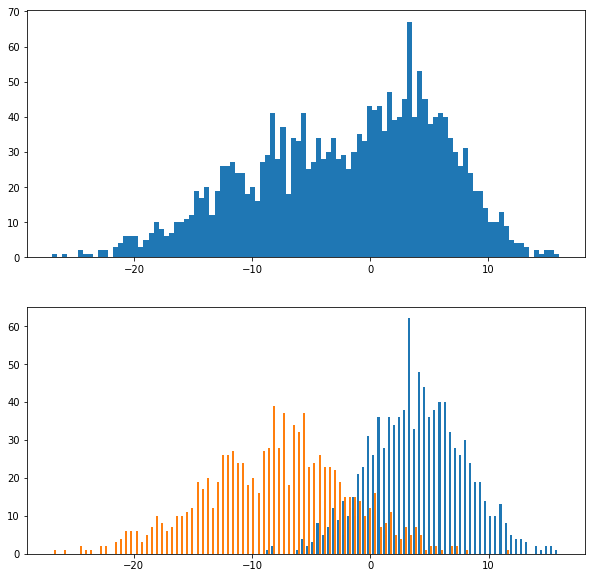

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
res = plt.hist(x, bins=100)
plt.subplot(2,1,2)
res = plt.hist([positive_samples, negative_samples], bins=100)

In [14]:
x = np.atleast_2d(x).T
print(x.shape)
print(y_onehot.shape)
print(y.shape)

(2000, 1)
(2000, 2)
(2000,)


In [15]:
# Create logistic regression model
w_init = np.random.randn(1)
print('Initial weight value = {}'.format(w_init[0]))
w = tf.Variable(w_init, dtype=tf.float32)
b = tf.Variable(1.0)
weighted_x = w * x + b
y_prob_pos = tf.nn.sigmoid(weighted_x)
y_prob_neg = 1 - y_prob_pos
y_prob = tf.concat([y_prob_neg, y_prob_pos], 1)

Initial weight value = 0.002802628635216813


In [16]:
# Loss: MSE
loss = tf.nn.l2_loss(y_prob - y_onehot)
# Logistic accuracy
correct_prediction = tf.equal(tf.arg_max(y_prob, 1), tf.arg_max(y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(loss)

In [18]:
# Main loop
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    init_vals = session.run([loss, w, b])
    print('Initial values: loss={}  w={}  b={}'.format(*init_vals))
    
    for step in range(150):
        print('Step {}'.format(step))
        vals = session.run([train, loss, accuracy, w, b])
        print('loss={}  accuracy={}  w={}  b={}'.format(*vals[1:]))
        print()

Initial values: loss=599.0918579101562  w=[ 0.00280263]  b=1.0
Step 0
loss=599.0918579101562  accuracy=0.5  w=[ 0.27712464]  b=0.9815681576728821

Step 1
loss=194.53900146484375  accuracy=0.8734999895095825  w=[ 0.31355897]  b=0.9752329587936401

Step 2
loss=182.98492431640625  accuracy=0.8790000081062317  w=[ 0.33918166]  b=0.9702316522598267

Step 3
loss=176.9552001953125  accuracy=0.8840000033378601  w=[ 0.35904855]  b=0.9660159945487976

Step 4
loss=173.21588134765625  accuracy=0.8880000114440918  w=[ 0.37525526]  b=0.9623366594314575

Step 5
loss=170.67349243164062  accuracy=0.890500009059906  w=[ 0.38890302]  b=0.9590535163879395

Step 6
loss=168.84042358398438  accuracy=0.890500009059906  w=[ 0.40065086]  b=0.9560781121253967

Step 7
loss=167.46337890625  accuracy=0.8889999985694885  w=[ 0.41092774]  b=0.953350305557251

Step 8
loss=166.39682006835938  accuracy=0.8895000219345093  w=[ 0.42002994]  b=0.95082688331604

Step 9
loss=165.5511016845703  accuracy=0.8899999856948853  w=